In [118]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import precision_score, accuracy_score, f1_score, recall_score, confusion_matrix

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [119]:
def evaluate_model(y_true, y_pred):
    results = []

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    confusion = confusion_matrix(y_true, y_pred)
    results.append((precision, recall, accuracy, f1, confusion))

    evaluation = pd.DataFrame(results, columns=["Precision Score", "Recall Score", "Accuracy Score", "F1 Score", "Confusion Matrix"])
    return evaluation

In [120]:
plank_df = pd.read_csv('./data/plank/train/train_data.csv')
print('Plank data shape:', plank_df.shape)
plank_df.head()

Plank data shape: (314, 65)


,label,left_shoulder_x,left_shoulder_y,left_shoulder_z,left_shoulder_v,right_shoulder_x,right_shoulder_y,right_shoulder_z,right_shoulder_v,left_elbow_x,...,right_heel_z,right_heel_v,left_foot_index_x,left_foot_index_y,left_foot_index_z,left_foot_index_v,right_foot_index_x,right_foot_index_y,right_foot_index_z,right_foot_index_v
0,c,0.755873,0.371340,0.142172,0.999981,0.780393,0.374476,-0.232091,0.999961,0.740323,...,-0.034949,0.987611,0.105399,0.816902,0.142222,0.768547,0.102585,0.836181,-0.154142,0.988942
1,c,0.204851,0.488668,-0.186090,0.999937,0.229784,0.380936,0.243581,0.999875,0.221035,...,0.165992,0.500833,0.893337,0.800755,-0.156181,0.965273,0.883106,0.752967,0.107020,0.515329
2,c,0.799452,0.323116,0.251574,0.999886,0.813881,0.419781,-0.201760,0.999942,0.783975,...,-0.084245,0.989843,0.120464,0.835478,0.194059,0.810170,0.086306,0.890535,-0.209508,0.990062
3,c,0.244420,0.371601,-0.261188,0.999804,0.264717,0.310763,0.295749,0.999603,0.251703,...,0.270052,0.312724,0.891732,0.877317,-0.229655,0.939585,0.886772,0.819571,0.159524,0.374121
4,c,0.243312,0.473431,-0.390952,0.999932,0.257345,0.371256,0.281002,0.999812,0.270554,...,0.427192,0.434707,0.928693,0.914889,-0.077621,0.873237,0.910039,0.877281,0.310827,0.421052


In [121]:
X = plank_df.drop(columns=['label'])
Y = plank_df['label']

In [122]:
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)  # Converts 'low', 'high', 'correct' to 0, 1, 2

In [123]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [124]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=42)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', Y_train.shape)
print('y_test shape:', Y_test.shape)

X_train shape: (219, 64)
X_test shape: (95, 64)
y_train shape: (219,)
y_test shape: (95,)


# **Neural Network**

In [125]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [126]:
neural_network = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 classes: low, high, correct
])

/Users/jonawfon/Desktop/csci184_project/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [127]:
# Compile the model
neural_network.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
neural_network.fit(X_train, Y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3532 - loss: 1.4512 - val_accuracy: 0.4318 - val_loss: 1.0797
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4242 - loss: 1.3478 - val_accuracy: 0.4545 - val_loss: 0.9976
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4289 - loss: 1.2000 - val_accuracy: 0.6136 - val_loss: 0.9346
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4191 - loss: 1.1796 - val_accuracy: 0.6591 - val_loss: 0.8878
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4472 - loss: 1.1060 - val_accuracy: 0.7500 - val_loss: 0.8500
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5145 - loss: 0.9340 - val_accuracy: 0.7727 - val_loss: 0.8153
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5442 - loss: 0.9231 - val_accuracy: 0.7500 - val_loss: 0.7845
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5939 - loss: 0.8671 - val_accuracy: 0.7727 - val_loss: 0.7525

In [128]:
# Evaluate the model
Y_pred_nn = neural_network.predict(X_test)
evaluate_model(Y_test, np.argmax(Y_pred_nn, axis=1))

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/stepWARNING:tensorflow:5 out of the last 16 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x350dda980> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


,Precision Score,Recall Score,Accuracy Score,F1 Score,Confusion Matrix
0,0.949702,0.950717,0.947368,0.950071,"[[33, 0, 3], [0, 28, 0], [2, 0, 29]]"


# **SVM**

In [129]:
from sklearn.svm import SVC

In [130]:
# Train the support vector machine classifier
svm_clf = SVC(kernel='linear', random_state=42)
svm_clf.fit(X_train, Y_train)

SVC(kernel='linear', random_state=42)

In [131]:
# Predict and evaluate the model
Y_pred_svm = svm_clf.predict(X_test)
evaluate_model(Y_test, Y_pred_svm)

,Precision Score,Recall Score,Accuracy Score,F1 Score,Confusion Matrix
0,0.947222,0.933521,0.936842,0.938423,"[[35, 0, 1], [3, 25, 0], [2, 0, 29]]"


# **Random Forest**

In [132]:
from sklearn.ensemble import RandomForestClassifier

In [133]:
# Train the random forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [134]:
# Predict and evaluate the model
Y_pred_rf = rf_clf.predict(X_test)
accuracy_rf = accuracy_score(Y_test, Y_pred_rf)

In [136]:
evaluate_model(Y_test, Y_pred_rf)

,Precision Score,Recall Score,Accuracy Score,F1 Score,Confusion Matrix
0,0.884073,0.892174,0.884211,0.885747,"[[29, 3, 4], [0, 28, 0], [3, 1, 27]]"


# **Test Data**

In [137]:
test_data = pd.read_csv('./data/plank/test/test_data.csv')
print('Test Data Shape:', test_data.shape)
test_data

Test Data Shape: (15, 65)


,label,left_shoulder_x,left_shoulder_y,left_shoulder_z,left_shoulder_v,right_shoulder_x,right_shoulder_y,right_shoulder_z,right_shoulder_v,left_elbow_x,...,right_heel_z,right_heel_v,left_foot_index_x,left_foot_index_y,left_foot_index_z,left_foot_index_v,right_foot_index_x,right_foot_index_y,right_foot_index_z,right_foot_index_v
0,c,0.714614,0.519723,0.201462,0.999987,0.729075,0.541016,-0.250548,0.999981,0.704564,...,-0.082120,0.994909,0.164946,0.719515,0.129273,0.934534,0.153084,0.731450,-0.185452,0.995518
1,c,0.787049,0.331529,0.278550,0.999940,0.821669,0.378449,-0.295977,0.999963,0.778385,...,0.089337,0.995814,0.102723,0.916706,0.330069,0.879700,0.085149,0.954046,-0.041968,0.994629
2,c,0.269111,0.595271,-0.430963,0.999986,0.244112,0.531469,0.152096,0.999922,0.388862,...,0.691453,0.507217,0.904117,0.811899,0.003750,0.976133,0.862345,0.772885,0.614237,0.556602
3,c,0.725329,0.411023,0.241991,0.999954,0.745769,0.441340,-0.214798,0.999894,0.730552,...,-0.032006,0.953844,0.111073,0.849412,0.150137,0.593378,0.099482,0.871862,-0.160276,0.942345
4,c,0.367654,0.669358,-0.218309,0.999888,0.374715,0.666738,0.179499,0.999387,0.363128,...,0.302068,0.319193,0.753048,0.852669,-0.085756,0.908649,0.733268,0.842049,0.225437,0.343772
5,l,0.778960,0.393427,0.176537,0.999959,0.804280,0.479416,-0.257508,0.999933,0.765966,...,0.031335,0.964869,0.058047,0.824998,0.205295,0.527107,0.051062,0.835042,-0.030396,0.952871
6,l,0.201275,0.413116,-0.169261,0.999772,0.230501,0.349821,0.135527,0.999751,0.206352,...,0.129688,0.155028,0.879079,0.842187,-0.060816,0.788053,0.849460,0.793299,0.078431,0.176560
7,l,0.168011,0.484120,-0.207193,0.999966,0.205339,0.419365,0.345297,0.999914,0.196024,...,0.285441,0.430030,0.912898,0.821241,-0.240395,0.899614,0.885103,0.760242,0.203536,0.328393
8,l,0.211965,0.414620,-0.218370,0.999606,0.227408,0.345900,0.183866,0.999125,0.247130,...,0.204968,0.317796,0.884108,0.892390,-0.133130,0.915458,0.861084,0.841811,0.151035,0.288934
9,l,0.237173,0.427308,-0.268660,0.999757,0.271587,0.393058,0.158602,0.999679,0.255956,...,0.332239,0.163590,0.889659,0.657582,-0.107831,0.823099,0.856326,0.615896,0.288328,0.172183


In [139]:
x_test = test_data.drop(columns=['label'])
y_test = test_data['label']
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_test shape: (15, 64)
y_test shape: (15,)


In [140]:
label_encoder = LabelEncoder()
y_test = label_encoder.fit_transform(y_test)  # Converts 'low', 'high', 'correct' to 0, 1, 2

### **Neural Network**

In [144]:
nn_predictions = neural_network.predict(x_test)
y_pred_nn = np.argmax(nn_predictions, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [145]:
nn_evaluation = evaluate_model(y_test, y_pred_nn)
nn_evaluation

/Users/jonawfon/Desktop/csci184_project/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Precision Score,Recall Score,Accuracy Score,F1 Score,Confusion Matrix
0,0.111111,0.333333,0.333333,0.166667,"[[5, 0, 0], [5, 0, 0], [5, 0, 0]]"


<Axes: >

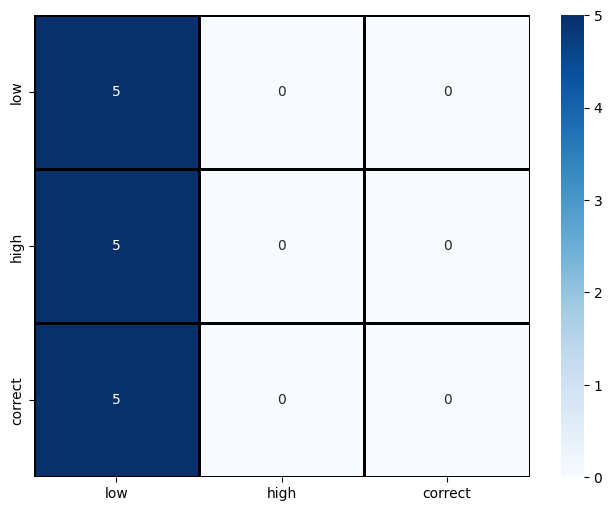

In [148]:
nn_confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_nn), index=['low', 'high', 'correct'], columns=['low', 'high', 'correct'])

figure, axis = plt.subplots(1, 1, figsize=(8, 6))
sns.heatmap(nn_confusion_matrix, annot=True, fmt='d', cmap='Blues', ax=axis, linewidths=1, linecolor='black')

### **SVM**

In [149]:
y_pred_svm = svm_clf.predict(x_test)
print('Y_pred_svm:', y_pred_svm)
print('Y_test:', y_test)

Y_pred_svm: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Y_test: [0 0 0 0 0 2 2 2 2 2 1 1 1 1 1]


/Users/jonawfon/Desktop/csci184_project/venv/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [152]:
svm_evaluation = evaluate_model(y_test, y_pred_svm)
svm_evaluation

/Users/jonawfon/Desktop/csci184_project/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Precision Score,Recall Score,Accuracy Score,F1 Score,Confusion Matrix
0,0.111111,0.333333,0.333333,0.166667,"[[5, 0, 0], [5, 0, 0], [5, 0, 0]]"


<Axes: >

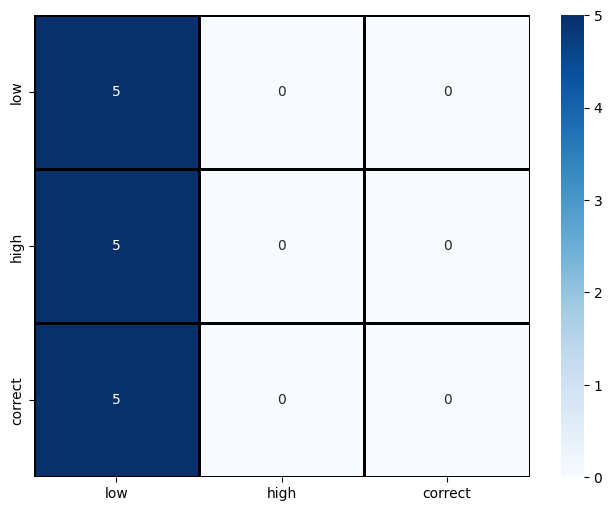

In [153]:
svm_confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_svm), index=['low', 'high', 'correct'], columns=['low', 'high', 'correct'])

figure, axis = plt.subplots(1, 1, figsize=(8, 6))
sns.heatmap(svm_confusion_matrix, annot=True, fmt='d', cmap='Blues', ax=axis, linewidths=1, linecolor='black')

### **Random Forest**

In [154]:
y_pred_rf = rf_clf.predict(x_test)
print('Y_pred_svm:', y_pred_rf)
print('Y_test:', y_test)


Y_pred_svm: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Y_test: [0 0 0 0 0 2 2 2 2 2 1 1 1 1 1]


/Users/jonawfon/Desktop/csci184_project/venv/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [155]:
random_forest_evaluation = evaluate_model(y_test, y_pred_rf)
random_forest_evaluation

/Users/jonawfon/Desktop/csci184_project/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Precision Score,Recall Score,Accuracy Score,F1 Score,Confusion Matrix
0,0.111111,0.333333,0.333333,0.166667,"[[5, 0, 0], [5, 0, 0], [5, 0, 0]]"


<Axes: >

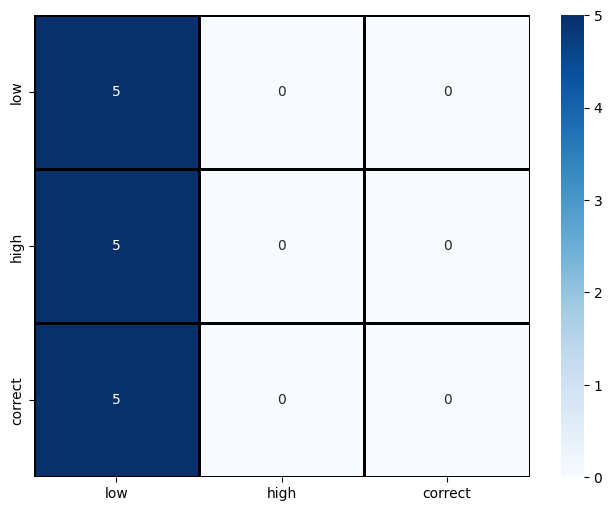

In [156]:
random_forest_confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_rf), index=['low', 'high', 'correct'], columns=['low', 'high', 'correct'])

figure, axis = plt.subplots(1, 1, figsize=(8, 6))
sns.heatmap(random_forest_confusion_matrix, annot=True, fmt='d', cmap='Blues', ax=axis, linewidths=1, linecolor='black')